# In this SQL project, you will learn to perform various data wrangling activities on an ecommerce database.



- Understanding the project and how to use Oracle SQL Developer.
- Understanding the basics of data analysis, SQL commands, and their application.
- Understanding the use of Oracle SQL Developer.
- Understanding the concept of Data Wrangling.
- Understanding the Online Shopping database.
- Perform Data Wrangling activities on the data.



This project involves the understanding of the Online Shopping Database, and using this database to perform the following Data Wrangling activities-

- Split full name into the first name and last name

- Correct phone numbers and emails which are not in a proper format

- Correct contact number and remove full name

- Read BLOB column and fetch attribute details from the regular tag

- Read BLOB column and fetch attribute details from nested columns

- Read BLOB column and fetch attribute details from nested columns

- Create separate tables for blob attributes

- Remove invalid records from order_items where shipment_id is not mapped

- Map missing first name and last name with email id credentials


# 0_customer_order_ddl

In [ ]:
# PROMPT Creating tables

create table customers (
  customer_id     integer generated by default on null as identity,
  email_address   varchar2(255 char) not null,
  full_name       varchar2(255 char),
  first_name       varchar2(255 char),
  last_name       varchar2(255 char))
;

create table stores (
  store_id          integer generated by default on null as identity ,
  store_name        varchar2(255 char) not null,
  web_address       varchar2(100 char),
  physical_address  varchar2(512 char),
  latitude          number,
  longitude         number,
  logo              blob,
  logo_mime_type    varchar2(512 char),
  logo_filename     varchar2(512 char),
  logo_charset      varchar2(512 char),
  logo_last_updated date)
;

create table products (
  product_id         integer generated by default on null as identity ,
  product_name       varchar2(255 char) not null,
  unit_price         number(10,2),
  product_details    blob,
  product_image      blob,
  image_mime_type    varchar2(512 char),
  image_filename     varchar2(512 char),
  image_charset      varchar2(512 char),
  image_last_updated date)
;

create table orders (
  order_id        integer
                  generated by default on null as identity,
  order_datetime  timestamp not null,
  customer_id     integer not null,
  order_status    varchar2(10 char) not null,
  store_id        integer not null)
;

create table shipments (
  shipment_id          integer
                       generated by default on null as identity,
  store_id             integer not null,
  customer_id          integer not null,
  delivery_address     varchar2(512 char) not null,
  shipment_status      varchar2(100 char) not null)
;

create table order_items (
  order_id        integer not null,
  line_item_id    integer not null,
  product_id      integer not null,
  unit_price      number(10,2) not null,
  quantity        integer not null,
  shipment_id     integer)
;

create table inventory (
  inventory_id          integer
                        generated by default on null as identity,
  store_id              integer not null,
  product_id            integer not null,
  product_inventory     integer not null)
;


/*
PROMPT Creating indexes

create index customers_name_i on customers ( full_name );
create index orders_customer_id_i on orders ( customer_id );
create index orders_store_id_i on orders ( store_id );
create index shipments_store_id_i on shipments ( store_id );
create index shipments_customer_id_i on shipments ( customer_id );
create index order_items_shipment_id_i on order_items ( shipment_id );
create index inventory_product_id_i on inventory ( product_id );
*/

# 1_add_customers_dml

In [ ]:
PROMPT INSERTING into CUSTOMERS
  truncate table customers;
  insert into customers (CUSTOMER_ID,EMAIL_ADDRESS,FULL_NAME) values (1,'tammy.bryant@internalmail','Tammy Bryant');
  insert into customers (CUSTOMER_ID,EMAIL_ADDRESS,FULL_NAME) values (392,'adam.miller@internalmail','Adam Miller');

COMMIT;

/*
update CUSTOMERS
set first_name = substr(FULL_NAME, 1,instr(FULL_NAME, ' ', 1)-1),
last_name = substr(FULL_NAME, instr(FULL_NAME, ' ', 1));

alter table CUSTOMERS drop column full_name;
*/

alter table CUSTOMERS add contact_number NUMBER;

update CUSTOMERS
set contact_number = round(dbms_random.value(0,9999999999),1);


update CUSTOMERS
set full_name = null
where CUSTOMER_ID >=385;

COMMIT;

In [ ]:
# CUSTOMER_ID	NUMBER(38,0)	No	"SYSTEM"."ISEQ$$_77257".nextval	1	Auto-incrementing primary key
# EMAIL_ADDRESS	VARCHAR2(255 CHAR)	No		2	The email address the person uses to access the account
# FULL_NAME	VARCHAR2(255 CHAR)	Yes		3	What this customer is called
# FIRST_NAME	VARCHAR2(255 CHAR)	Yes		4	What this customer is called: First Name
# LAST_NAME	VARCHAR2(255 CHAR)	Yes		5	What this customer is called: Last Name
# CONTACT_NUMBER	NUMBER	Yes		6

# 2_add_stores_dml

In [ ]:
truncate table stores;
  insert into stores (STORE_ID,STORE_NAME,WEB_ADDRESS,PHYSICAL_ADDRESS,LATITUDE,LONGITUDE,LOGO,LOGO_MIME_TYPE) values (1,'Online','https://www.example.com',null,null,null, EMPTY_BLOB(),null);
  insert into stores (STORE_ID,STORE_NAME,WEB_ADDRESS,PHYSICAL_ADDRESS,LATITUDE,LONGITUDE,LOGO,LOGO_MIME_TYPE) values (23,'Tel Aviv',null,'B, Aharon Bart St 18, Petah Tikva, 4951400, Israel',32.100664,34.862138, EMPTY_BLOB(),null);
COMMIT;

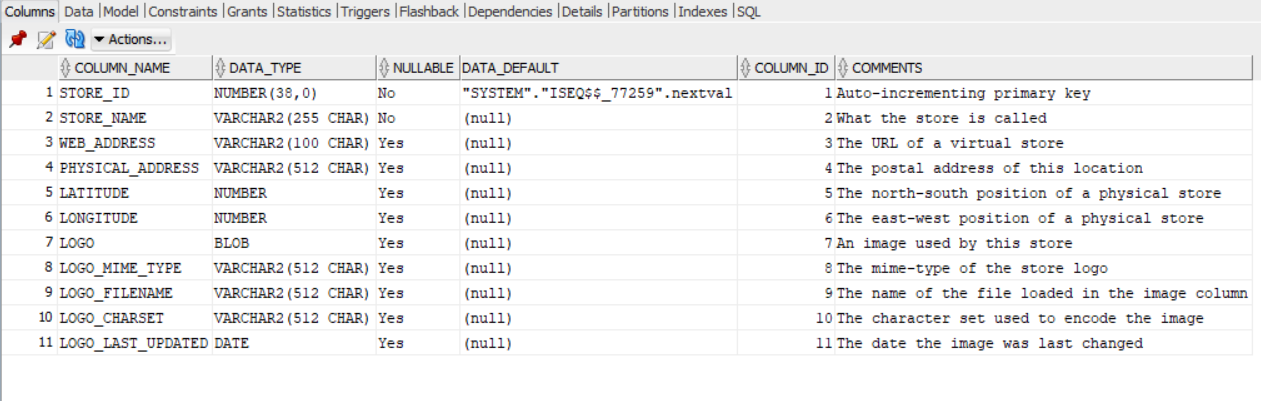

# 3_add_products_dml

In [ ]:
truncate table products;

SET DEFINE OFF;
declare
  prod_details varchar2(32767);
begin
  insert into products (PRODUCT_ID,PRODUCT_NAME,UNIT_PRICE,PRODUCT_DETAILS) values (1,'Boy''s Shirt (White)',29.55,utl_raw.cast_to_raw ( '{"colour":"white","gender":"Boy''s","brand":"COMTOURS","description":"Labore commodo velit cupidatat ullamco ea proident velit sunt adipisicing. Esse tempor exercitation reprehenderit ullamco esse incididunt dolore laboris Lorem ipsum fugiat ea.","sizes":["1 Yr","2 Yr","3-4 Yr","5-6 Yr","7-8 Yr","9-10 Yr"],"reviews":[]}') );
  insert into products (PRODUCT_ID,PRODUCT_NAME,UNIT_PRICE,PRODUCT_DETAILS) values (2,'Women''s Shirt (Green)',16.67,utl_raw.cast_to_raw ( '{"colour":"green","gender":"Women''s","brand":"FLEETMIX","description":"Excepteur anim adipisicing aliqua ad. Ex aliquip ad tempor cupidatat dolore ipsum ex anim Lorem aute amet.","sizes":[0,2,4,6,8,10,12,14,16,18,20],"reviews":[{"rating":8,"review":"Laborum ipsum adipisicing magna nulla tempor incididunt."},{"rating":10,"review":"Cupidatat dolore nulla pariatur quis quis."},{"rating":9,"review":"Pariatur mollit dolor in deserunt cillum consectetur."},{"rating":3,"review":"Dolore occaecat mollit id ad aliqua irure reprehenderit amet eiusmod pariatur."},{"rating":10,"review":"Est pariatur et qui minim velit non consectetur sint fugiat ad."},{"rating":6,"review":"Et pariatur ipsum eu qui."},{"rating":6,"review":"Voluptate labore irure cupidatat mollit irure quis fugiat enim laborum consectetur officia sunt."},{"rating":8,"review":"Irure elit do et elit aute veniam proident sunt."},{"rating":8,"review":"Aute mollit proident id veniam occaecat dolore mollit dolore nostrud."}]}') );
  insert into products (PRODUCT_ID,PRODUCT_NAME,UNIT_PRICE,PRODUCT_DETAILS) values (3,'Boy''s Sweater (Green)',44.17,utl_raw.cast_to_raw ( '{"colour":"green","gender":"Boy''s","brand":"KINETICA","description":"Occaecat dolore in ut et ad pariatur laborum mollit nulla exercitation. Laboris esse tempor quis velit nostrud exercitation veniam reprehenderit minim minim exercitation.","sizes":["1 Yr","2 Yr","3-4 Yr","5-6 Yr","7-8 Yr","9-10 Yr"],"reviews":[{"rating":5,"review":"Sunt ad proident excepteur laboris officia eu reprehenderit dolor nostrud elit nulla pariatur incididunt Lorem."},{"rating":2,"review":"Ullamco ad amet fugiat adipisicing."}]}') );

  -- split over two lines as 32k varchar2 to avoid SQL*Plus length limit
  prod_details := '{"colour":"white","gender":"Boy''s","brand":"INTERLOO","description":"Nostrud esse velit incididunt occaecat ullamco dolor quis reprehenderit proident dolore deserunt tempor qui proident. Magna deserunt sit minim eu commodo minim labore occaecat ea id sint laborum.","sizes":["1 Yr","2 Yr","3-4 Yr","5-6 Yr","7-8 Yr","9-10 Yr"],"reviews":[{"rating":7,"review":"Anim culpa qui est adipisicing qui dolore enim. Sint duis aute laborum nisi ut elit Lorem nisi proident consectetur."},{"rating":6,"review":"Reprehenderit ad ipsum sint mollit aliqua."},{"rating":4,"review":"Enim culpa reprehenderit non ullamco non ex veniam. Sit do incididunt ullamco ad et et aliquip deserunt dolor officia nostrud ipsum officia nostrud. Lorem esse tempor aliqua ut quis occaecat."},{"rating":9,"review":"Pariatur sit dolor dolor tempor commodo aute culpa sit."},{"rating":2,"review":"Sunt enim sunt occaecat exercitation deserunt nisi anim mollit deserunt non laboris cillum."},{"rating":8,"review":"Exercitation et duis quis minim id duis veniam occaecat amet cillum velit pariatur tempor. Culpa aliquip adipisicing aliquip non minim occaecat eu nisi esse veniam eu aliqua."},{"rating":5,"review":"Culpa elit nulla dolore mollit tempor mollit in. Voluptate deserunt eiusmod sint id excepteur eiusmod excepteur qui enim cupidatat. Nostrud enim anim commodo adipisicing nisi dolore commodo elit commodo aliqua aliquip laborum."},{"rating":4,"review":"Exercitation sunt consequat anim nisi sunt cillum esse amet ut reprehenderit ea. Laborum labore ipsum consectetur ad excepteur proident fugiat consectetur eiusmod incididunt officia enim ullamco."},{"rating":2,"review":"Duis elit dolore Lorem commodo fugiat ad aliquip mollit ea. Sit fugiat officia tempor magna sit nisi irure exercitation deserunt mollit. Consequat est sunt qui non adipisicing."},{"rating":8,"review":"Nostrud laboris enim enim officia officia in non proident in do fugiat sit Lorem aliquip. Culpa ex voluptate exercitation velit."},{"rating":4,"review":"Sit ullamco est esse dolore sint aliquip enim id velit aliqua ex. Ex velit nulla occaecat ipsum reprehenderit."},{"rating":5,"review":"Deserunt nisi minim culpa cupidatat Lorem nisi anim pariatur tempor ut officia. Est minim veniam eiusmod eiusmod mollit aliqua incididunt aliqua nisi officia dolor amet cillum est."},' || chr(10) ||
'{"rating":2,"review":"Labore incididunt quis dolor nostrud cupidatat culpa aute ullamco culpa proident aliqua. Ut minim ullamco mollit do elit laboris adipisicing elit."},{"rating":3,"review":"Sunt nisi est culpa anim eu et cillum eu deserunt fugiat et id ullamco ea. Aliquip et amet est Lorem duis aliquip sunt aliqua adipisicing occaecat dolor."},{"rating":2,"review":"Ipsum culpa elit id officia consequat tempor esse enim cupidatat."},{"rating":9,"review":"Quis do duis Lorem dolor proident ex Lorem eiusmod quis deserunt officia reprehenderit. Sint ullamco in in reprehenderit excepteur. Eiusmod ut enim id nisi."},{"rating":7,"review":"Dolor nisi laboris cillum laboris amet fugiat magna enim est veniam quis. Ipsum voluptate ea ipsum consequat nisi velit."},{"rating":2,"review":"Sunt occaecat irure excepteur Lorem eiusmod laboris sit ex duis ea non sunt. Eiusmod cillum ex in labore cillum sint ex eiusmod reprehenderit elit. Proident aute ad occaecat esse minim."},{"rating":2,"review":"Voluptate enim minim elit esse ea laboris esse."},{"rating":7,"review":"Cillum ullamco consectetur irure reprehenderit voluptate cillum pariatur cillum. Fugiat elit elit anim culpa exercitation ex enim."},{"rating":1,"review":"Pariatur reprehenderit velit excepteur esse eiusmod sit. Veniam ut do cupidatat duis."},{"rating":2,"review":"Tempor velit irure duis voluptate."},{"rating":7,"review":"Reprehenderit culpa ad nisi ut minim anim id dolore."},{"rating":8,"review":"Cupidatat aute incididunt nostrud ex aute ad dolore. Enim labore elit voluptate culpa deserunt aliquip minim."},{"rating":9,"review":"Ad ea exercitation laboris proident occaecat laborum veniam ipsum occaecat aute proident ad."},{"rating":9,"review":"Velit ipsum nulla in adipisicing. Dolore eu et enim enim esse culpa irure non ut in labore labore aliqua. Sint ullamco laboris eiusmod minim veniam voluptate esse veniam exercitation voluptate qui pariatur."},{"rating":10,"review":"Dolor duis pariatur aliqua excepteur exercitation pariatur incididunt sit proident eu labore ea. Sint tempor proident amet sint anim Lorem reprehenderit sit pariatur voluptate dolore velit."},{"rating":1,"review":"Eiusmod ad aute ullamco aute mollit est reprehenderit consectetur nisi nulla amet consectetur culpa. Do et commodo sit deserunt aliqua deserunt non culpa est occaecat."},{"rating":4,"review":"Cupidatat est sint velit amet incididunt esse magna nostrud ea mollit nisi enim ad voluptate."},{"rating":10}]}';

  insert into products (PRODUCT_ID,PRODUCT_NAME,UNIT_PRICE,PRODUCT_DETAILS) values (4,'Boy''s Trousers (White)',43.71,utl_raw.cast_to_raw ( prod_details ) );
  insert into products (PRODUCT_ID,PRODUCT_NAME,UNIT_PRICE,PRODUCT_DETAILS) values (46,'Girl''s Trousers (Red)',39.16,utl_raw.cast_to_raw ( '{"colour":"red","gender":"Girl''s","brand":"OTHERSIDE","description":"Lorem officia laborum deserunt veniam cillum anim adipisicing minim aute ad esse sint sit tempor. Magna enim proident eiusmod incididunt adipisicing duis deserunt pariatur sint officia occaecat est minim ipsum.","sizes":["1 Yr","2 Yr","3-4 Yr","5-6 Yr","7-8 Yr","9-10 Yr"],"reviews":[{"rating":9,"review":"Magna magna ullamco ipsum pariatur occaecat eiusmod amet ea sunt reprehenderit dolore aute voluptate."},{"rating":7,"review":"Eiusmod cupidatat cillum qui dolor consequat."},{"rating":4,"review":"Do proident cillum cupidatat laboris in cillum."},{"rating":5,"review":"Sunt eiusmod ea labore est sint adipisicing velit duis."},{"rating":6,"review":"Ut consectetur ad magna officia ut aliqua deserunt magna."}]}') );

  COMMIT;
end;
/

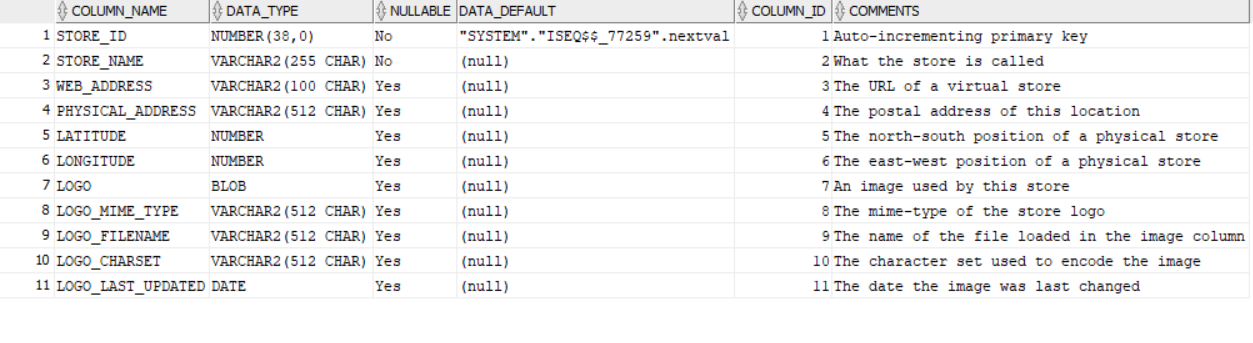

# 4_add_orders_dml

In [ ]:
truncate table ORDERS;
Insert into ORDERS (ORDER_ID,ORDER_DATETIME,CUSTOMER_ID,STORE_ID,ORDER_STATUS) values (1,to_timestamp('04-FEB-2018 13.20.22.245676861','DD-MON-YYYY HH24.MI.SS.FF'),3,1,'CANCELLED');
Insert into ORDERS (ORDER_ID,ORDER_DATETIME,CUSTOMER_ID,STORE_ID,ORDER_STATUS) values (1950,to_timestamp('12-APR-2019 21.41.06.642640525','DD-MON-YYYY HH24.MI.SS.FF'),348,23,'COMPLETE');

COMMIT;

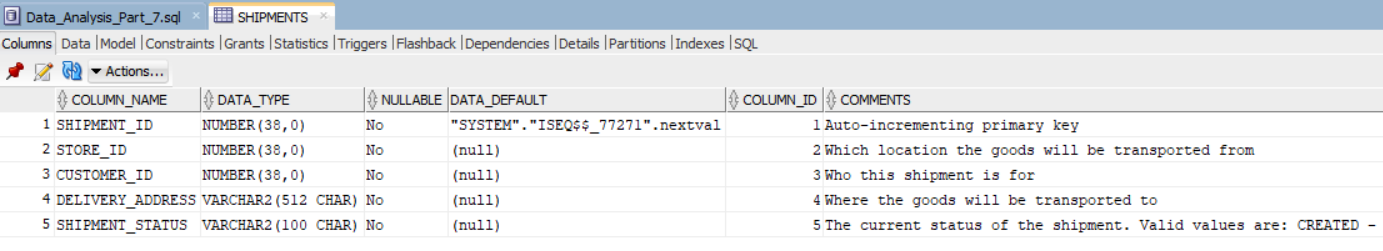

# 5_add_shipments_dml

In [ ]:
truncate table shipments;
insert into shipments (SHIPMENT_ID,STORE_ID,CUSTOMER_ID,DELIVERY_ADDRESS,SHIPMENT_STATUS) values (1,1,45,'Jobstown, NJ 08041 USA','DELIVERED');
insert into shipments (SHIPMENT_ID,STORE_ID,CUSTOMER_ID,DELIVERY_ADDRESS,SHIPMENT_STATUS) values (2026,1,354,'Stockdale, TX 78160 USA','CREATED');

COMMIT;

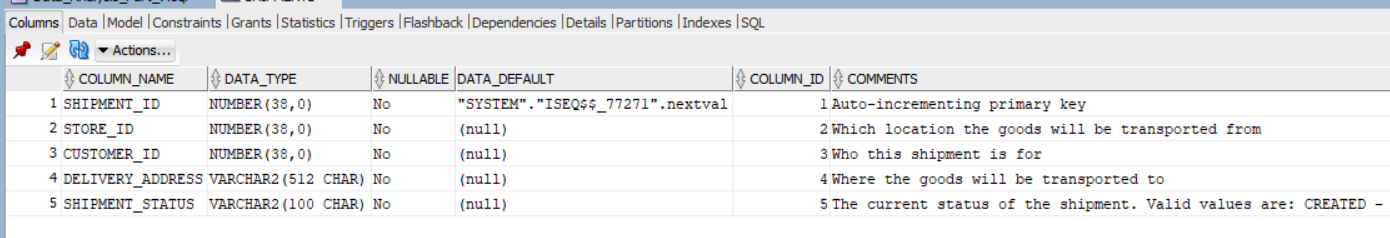

# 6_add_inventory_dml

In [ ]:
truncate table inventory;
insert into inventory (product_id,store_id,product_inventory) values (1,10,10);

insert into inventory (product_id,store_id,product_inventory) values (32,19,8);

COMMIT;

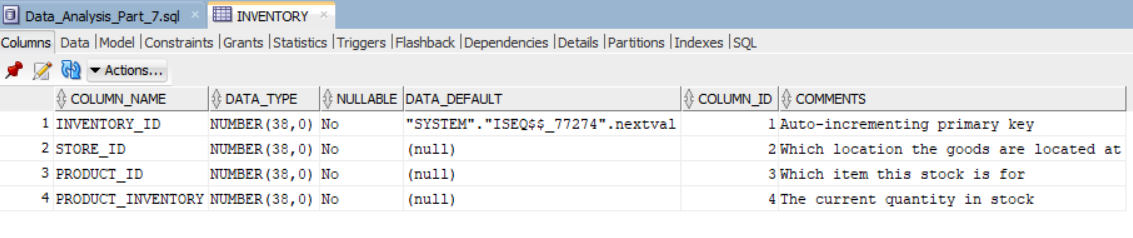

# 7_add_order_items_dml

In [ ]:
truncate table order_items;
insert into order_items (ORDER_ID,LINE_ITEM_ID,PRODUCT_ID,UNIT_PRICE,QUANTITY,SHIPMENT_ID) values (1,1,33,37,4,null);

insert into order_items (ORDER_ID,LINE_ITEM_ID,PRODUCT_ID,UNIT_PRICE,QUANTITY,SHIPMENT_ID) values (1950,2,26,48.75,4,null);

COMMIT;

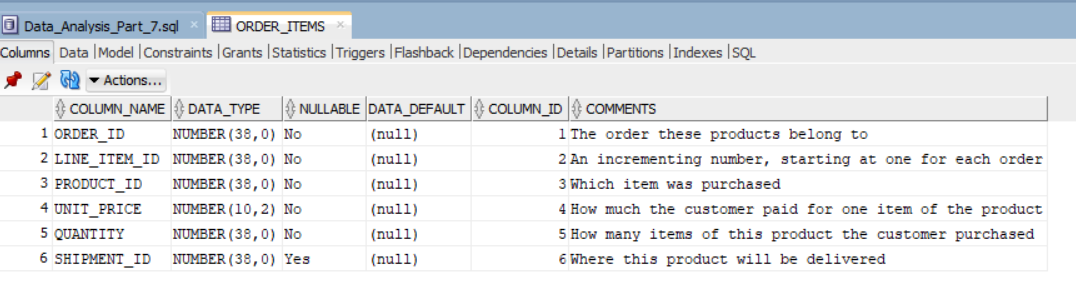

# 8_comments

In [ ]:
PROMPT creating comments

comment on table customers
  is 'Details of the people placing orders';

comment on column customers.customer_id
  is 'Auto-incrementing primary key';

comment on column customers.email_address
  is 'The email address the person uses to access the account';

comment on column customers.full_name
  is 'What this customer is called';

comment on column customers.first_name
  is 'What this customer is called: First Name';

comment on column customers.last_name
  is 'What this customer is called: Last Name';

comment on table stores
  is 'Physical and virtual locations where people can purchase products';

comment on column stores.store_id
  is 'Auto-incrementing primary key';

comment on column stores.store_name
  is 'What the store is called';

comment on column stores.web_address
  is 'The URL of a virtual store';

comment on column stores.physical_address
  is 'The postal address of this location';

comment on column stores.latitude
  is 'The north-south position of a physical store';

comment on column stores.longitude
  is 'The east-west position of a physical store';

comment on column stores.logo
  is 'An image used by this store';

comment on column stores.logo_mime_type
  is 'The mime-type of the store logo';

comment on column stores.logo_last_updated
  is 'The date the image was last changed';

comment on column stores.logo_filename
  is 'The name of the file loaded in the image column';

comment on column stores.logo_charset
  is 'The character set used to encode the image';

comment on table products
  is 'Details of goods that customers can purchase';

comment on column products.product_id
  is 'Auto-incrementing primary key';

comment on column products.unit_price
  is 'The monetary value of one item of this product';

comment on column products.product_details
  is 'Further details of the product stored in JSON format';

comment on column products.product_image
  is 'A picture of the product';

comment on column products.image_mime_type
  is 'The mime-type of the product image';

comment on column products.image_last_updated
  is 'The date the image was last changed';

comment on column products.image_filename
  is 'The name of the file loaded in the image column';

comment on column products.image_charset
  is 'The character set used to encode the image';

comment on column products.product_name
  is 'What a product is called';

comment on table orders
  is 'Details of who made purchases where';

comment on column orders.order_id
  is 'Auto-incrementing primary key';

comment on column orders.order_datetime
  is 'When the order was placed';

comment on column orders.customer_id
  is 'Who placed this order';

comment on column orders.store_id
  is 'Where this order was placed';

comment on column orders.order_status
  is 'What state the order is in. Valid values are:
OPEN - the order is in progress
PAID - money has been received from the customer for this order
SHIPPED - the products have been dispatched to the customer
COMPLETE - the customer has received the order
CANCELLED - the customer has stopped the order
REFUNDED - there has been an issue with the order and the money has been returned to the customer';

comment on table order_items
  is 'Details of which products the customer has purchased in an order';

comment on column order_items.order_id
  is 'The order these products belong to';

comment on column order_items.line_item_id
  is 'An incrementing number, starting at one for each order';

comment on column order_items.product_id
  is 'Which item was purchased';

comment on column order_items.unit_price
  is 'How much the customer paid for one item of the product';

comment on column order_items.quantity
  is 'How many items of this product the customer purchased';

comment on column order_items.shipment_id
  is 'Where this product will be delivered';

comment on table shipments
  is 'Details of where ordered goods will be delivered';

comment on column shipments.shipment_id
  is 'Auto-incrementing primary key';

comment on column shipments.store_id
  is 'Which location the goods will be transported from';

comment on column shipments.customer_id
  is 'Who this shipment is for';

comment on column shipments.delivery_address
  is 'Where the goods will be transported to';

comment on column shipments.shipment_status
  is 'The current status of the shipment. Valid values are:
CREATED - the shipment is ready for order assignment
SHIPPED - the goods have been dispatched
IN-TRANSIT - the goods are en-route to their destination
DELIVERED - the good have arrived at their destination';

comment on table inventory
  is 'Details of the quantity of stock available for products at each location';

comment on column inventory.inventory_id
  is 'Auto-incrementing primary key';

comment on column inventory.store_id
  is 'Which location the goods are located at';

comment on column inventory.product_id
  is 'Which item this stock is for';

comment on column inventory.product_inventory
  is 'The current quantity in stock';

In [ ]:
SELECT * FROM customers;
SELECT * FROM stores;
SELECT * FROM products;
SELECT * FROM orders;
SELECT * FROM shipments;
SELECT * FROM inventory;
SELECT * FROM order_items;

--truncate table order_items;



In [ ]:
/************************** 2. Split full name into first name and last name **************************/
--ex: FIRST_NAME: Tammy , LAST_NAME: Bryant

SELECT *
FROM customers
WHERE FIRST_NAME IS NOT NULL
OR LAST_NAME     IS NOT NULL;


SELECT FULL_NAME,
  SUBSTR(FULL_NAME, 1, INSTR(FULL_NAME, ' ')-1) AS FIRST_NAME,
  SUBSTR(FULL_NAME, INSTR(FULL_NAME, ' ')   +1) AS LAST_NAME
FROM CUSTOMERS
WHERE ROWNUM <= 5;

UPDATE CUSTOMERS
SET FIRST_NAME = SUBSTR(FULL_NAME, 1, INSTR(FULL_NAME, ' ')-1) ,
  LAST_NAME    = SUBSTR(FULL_NAME, INSTR(FULL_NAME, ' ')   +1);

COMMIT;

# Tammy Bryant	Tammy	Bryant
# Roy White	Roy	White
# Gary Jenkins	Gary	Jenkins
# Victor Morris	Victor	Morris
# Beverly Hughes	Beverly	Hughes

In [ ]:
/************************** 3. Correct phone numbers and email which are not in proper format **************************/

--Append .com in email id.

SELECT *
FROM CUSTOMERS
WHERE upper(EMAIL_ADDRESS) LIKE upper('%.com%');

SELECT *
FROM CUSTOMERS
WHERE upper(EMAIL_ADDRESS) NOT LIKE upper('%.com%');

UPDATE CUSTOMERS
SET EMAIL_ADDRESS = EMAIL_ADDRESS || '.com'
WHERE upper(EMAIL_ADDRESS) NOT LIKE upper('%.com%');

COMMIT;

--How many records have . in contact number?
--Solution
--remove .* from contact number

SELECT COUNT(*)
FROM CUSTOMERS
WHERE CONTACT_NUMBER LIKE '%.%';

SELECT CONTACT_NUMBER, SUBSTR(CONTACT_NUMBER, 1, INSTR(CONTACT_NUMBER, '.')-1)
FROM CUSTOMERS
WHERE CONTACT_NUMBER LIKE '%.%';

UPDATE CUSTOMERS
SET CONTACT_NUMBER = SUBSTR(CONTACT_NUMBER, 1, INSTR(CONTACT_NUMBER, '.')-1)
WHERE CONTACT_NUMBER LIKE '%.%';

COMMIT;

SELECT COUNT(*)
FROM CUSTOMERS
WHERE CONTACT_NUMBER NOT LIKE '%.%';

In [ ]:
/************************** 4. Correct contact number and remove full name **************************/

--How many contact number are less than 10 digit?
--Solution
--Make contact number as 9999999999 if the length is less than 10.


SELECT CONTACT_NUMBER, LENGTH(CONTACT_NUMBER)
FROM customers;

SELECT CONTACT_NUMBER, LENGTH(CONTACT_NUMBER)
FROM customers
WHERE LENGTH(CONTACT_NUMBER) < 10;

UPDATE CUSTOMERS
SET CONTACT_NUMBER = 9999999999
WHERE LENGTH(CONTACT_NUMBER) < 10;

COMMIT;

--Check for contact number where length is more than 10.

SELECT CONTACT_NUMBER, LENGTH(CONTACT_NUMBER)
FROM customers
WHERE LENGTH(CONTACT_NUMBER) > 10;

SELECT distinct LENGTH(CONTACT_NUMBER)
FROM customers;

SELECT *
FROM customers;
--Remove Full Name column from customers table
-- follow command is DDL command so it need not be COMMIT;, DDL commands are auto COMMIT
ALTER TABLE customers DROP COLUMN FULL_NAME;

COMMIT;

In [ ]:
/************************** 5. Read BLOB column and fetch attribute details from regular tag **************************/

SELECT * FROM products;
--PRODUCT_DETAILS--> (BLOB)
--{"colour":"white","gender":"Boy's","brand":"COMTOURS","description":"Labore commodo velit cupidatat ullamco ea proident velit sunt adipisicing. Esse tempor exercitation reprehenderit ullamco esse incididunt dolore laboris Lorem ipsum fugiat ea.","sizes":["1 Yr","2 Yr","3-4 Yr","5-6 Yr","7-8 Yr","9-10 Yr"],"reviews":[]}

/*
"colour":"green",
"gender":"Women's",
"brand":"FLEETMIX",
"description":"Excepteur anim adipisicing aliqua ad. Ex aliquip ad tempor cupidatat dolore ipsum ex anim Lorem aute amet.",
"sizes":[0,2,4,6,8,10,12,14,16,18,20],
"reviews":[{"rating":8,"review":"Laborum ipsum adipisicing magna nulla tempor incididunt."},{"rating":10,"review":"Cupidatat dolore nulla pariatur quis quis."},{"rating":9,"review":"Pariatur mollit dolor in deserunt cillum consectetur."},{"rating":3,"review":"Dolore occaecat mollit id ad aliqua irure reprehenderit amet eiusmod pariatur."},{"rating":10,"review":"Est pariatur et qui minim velit non consectetur sint fugiat ad."},{"rating":6,"review":"Et pariatur ipsum eu qui."},{"rating":6,"review":"Voluptate labore irure cupidatat mollit irure quis fugiat enim laborum consectetur officia sunt."},{"rating":8,"review":"Irure elit do et elit aute veniam proident sunt."},{"rating":8,"review":"Aute mollit proident id veniam occaecat dolore mollit dolore nostrud."}]}
*/

/*
TABLE_NAME, json_table (
    TABLE_NAME.BLOB_COLUMN_NAME
    columns (
      DYNAMIC_COLUMN_NAME_1 DATA_TYPE path '$.ATTRIBUTE_NAME1',
      DYNAMIC_COLUMN_NAME_2 DATA_TYPE path '$.ATTRIBUTE_NAME2'
    )
    )
*/
SELECT PRODUCT_ID,  PRODUCT_NAME,  UNIT_PRICE,  PRODUCT_DETAILS,  COLOUR
FROM PRODUCTS, JSON_TABLE (
    PRODUCTS.PRODUCT_DETAILS
    COLUMNS (
            colour
            )
        );

SELECT PRODUCT_ID,
  PRODUCT_NAME,
  UNIT_PRICE,
  PRODUCT_DETAILS,
  COLOUR_NAME,
  GENDER_TYPE
FROM PRODUCTS,
     JSON_TABLE
      (
        PRODUCTS.PRODUCT_DETAILS
        COLUMNS
            ( COLOUR_NAME VARCHAR2(50) PATH '$.colour',
              GENDER_TYPE VARCHAR2(20) PATH '$.gender' )
        );



In [ ]:

/************************** 6. Read BLOB column and fetch attribute details from nested columns **************************/

--{"colour":"green",
--"gender":"Women's",
--"brand":"FLEETMIX",
--"description":"Excepteur anim adipisicing aliqua ad. Ex aliquip ad tempor cupidatat dolore ipsum ex anim Lorem aute amet.",
--"sizes":[0,2,4,6,8,10,12,14,16,18,20],
--"reviews":[{"rating":8,
--"review":"Laborum ipsum adipisicing magna nulla tempor incididunt."},
--{"rating":10,"review":"Cupidatat dolore nulla pariatur quis quis."},
--{"rating":9,"review":"Pariatur mollit dolor in deserunt cillum consectetur."}
--,{"rating":3,"review":"Dolore occaecat mollit id ad aliqua irure reprehenderit amet eiusmod pariatur."},
--{"rating":10,"review":"Est pariatur et qui minim velit non consectetur sint fugiat ad."},
--{"rating":6,"review":"Et pariatur ipsum eu qui."},
--{"rating":6,"review":"Voluptate labore irure cupidatat mollit irure quis fugiat enim laborum consectetur officia sunt."},
--{"rating":8,"review":"Irure elit do et elit aute veniam proident sunt."},{"rating":8,"review":"Aute mollit proident id veniam occaecat dolore mollit dolore nostrud."}]}

/*
TABLE_NAME, json_table (
    TABLE_NAME.BLOB_COLUMN_NAME, '$.TAG_NAME[*]'
    columns (
      DYNAMIC_COLUMN_NAME_1 DATA_TYPE path '$.ATTRIBUTE_NAME1',
      DYNAMIC_COLUMN_NAME_2 DATA_TYPE path '$.ATTRIBUTE_NAME2'
    )
    )
*/

SELECT *
FROM PRODUCTS;

SELECT PRODUCT_ID, PRODUCT_NAME, UNIT_PRICE, PRODUCT_DETAILS, RATING, REVIEWS
FROM PRODUCTS,
  json_table (
    PRODUCTS.PRODUCT_DETAILS, '$.reviews[*]'
    COLUMNS (
        RATING NUMBER PATH '$.rating',
        REVIEWS VARCHAR2(200) PATH '$.review'
      )
);


In [ ]:
# 7. Create separate tables for blob attributes

/***************** 7. Create separate tables for with blob attributes **************************/

/*
"colour":"green",
"gender":"Women's",
"brand":"FLEETMIX",
"description":"Excepteur anim adipisicing aliqua ad. Ex aliquip ad tempor cupidatat dolore ipsum ex anim Lorem aute amet.",
"sizes":[0,2,4,6,8,10,12,14,16,18,20],
"reviews":[{"rating":8,"review":"Laborum ipsum adipisicing magna nulla tempor incididunt."},{"rating":10,"review":"Cupidatat dolore nulla pariatur quis quis."},{"rating":9,"review":"Pariatur mollit dolor in deserunt cillum consectetur."},{"rating":3,"review":"Dolore occaecat mollit id ad aliqua irure reprehenderit amet eiusmod pariatur."},{"rating":10,"review":"Est pariatur et qui minim velit non consectetur sint fugiat ad."},{"rating":6,"review":"Et pariatur ipsum eu qui."},{"rating":6,"review":"Voluptate labore irure cupidatat mollit irure quis fugiat enim laborum consectetur officia sunt."},{"rating":8,"review":"Irure elit do et elit aute veniam proident sunt."},{"rating":8,"review":"Aute mollit proident id veniam occaecat dolore mollit dolore nostrud."}]}
*/

--Create table for regular columns
CREATE TABLE PRODUCT_DETAILS AS
SELECT PRODUCT_ID,
  PRODUCT_NAME,
  UNIT_PRICE,
  COLOUR_NAME,
  GENDER_TYPE,
  BRAND,
  DESCRIPTION,
  SIZES
FROM PRODUCTS,
     JSON_TABLE
      (
        PRODUCTS.PRODUCT_DETAILS
        COLUMNS
            ( COLOUR_NAME VARCHAR2(50) PATH '$.colour',
              GENDER_TYPE VARCHAR2(20) PATH '$.gender',
              brand,
              description,
              sizes FORMAT JSON
              )
        );

SELECT * FROM PRODUCT_DETAILS;



--Create table for nested columns
CREATE TABLE PRODUCT_RATING AS
SELECT PRODUCT_ID, RATING, REVIEWS
FROM PRODUCTS,
  json_table (
    PRODUCTS.PRODUCT_DETAILS, '$.reviews[*]'
    COLUMNS (
        RATING NUMBER PATH '$.rating',
        REVIEWS VARCHAR2(200) PATH '$.review'
      )
);

SELECT * FROM PRODUCT_RATING;

--Join both the tables
SELECT * FROM
PRODUCT_DETAILS LEFT JOIN PRODUCT_RATING
ON PRODUCT_DETAILS.PRODUCT_ID = PRODUCT_RATING.PRODUCT_ID




In [ ]:
/***************** 8. Remove invalid records from order_items where shipment_id is not mapped **************************/


SELECT COUNT(*)
FROM order_items
WHERE SHIPMENT_ID IS NULL;

SELECT COUNT(*) FROM order_items;

SELECT * FROM order_items
WHERE SHIPMENT_ID IS NULL;

DELETE FROM ORDER_ITEMS
WHERE SHIPMENT_ID IS NULL;

COMMIT;

In [ ]:


/***************** 9. Map missing first name and last name with email id credentials **************************/

SELECT *
FROM customers
WHERE FIRST_NAME IS NULL
OR LAST_NAME IS NULL;

SELECT *
FROM CUSTOMERS;

--andrea.james@internalmail.com;
--james@internalmail.com;

SELECT EMAIL_ADDRESS,
  SUBSTR(EMAIL_ADDRESS, 1, INSTR(EMAIL_ADDRESS, '.')-1) FIRST_NAME,
  SUBSTR(EMAIL_ADDRESS, INSTR(EMAIL_ADDRESS, '.')+1,
                        INSTR(SUBSTR(EMAIL_ADDRESS, INSTR(EMAIL_ADDRESS, '.')+1), '@')-1) LAST_NAME,
  INSTR(EMAIL_ADDRESS, '.')+1, --andrea.james@internalmail.com;
  INSTR(EMAIL_ADDRESS, '@'),
  INSTR(SUBSTR(EMAIL_ADDRESS, INSTR(EMAIL_ADDRESS, '.')+1), '@')-1 -- STRING: james@internalmail.com;
FROM customers
WHERE FIRST_NAME IS NULL
OR LAST_NAME IS NULL;


--Update data
UPDATE CUSTOMERS
SET FIRST_NAME = SUBSTR(EMAIL_ADDRESS, 1, INSTR(EMAIL_ADDRESS, '.')-1),
    LAST_NAME = SUBSTR(EMAIL_ADDRESS, INSTR(EMAIL_ADDRESS, '.')+1,
                      INSTR(SUBSTR(EMAIL_ADDRESS, INSTR(EMAIL_ADDRESS, '.')+1), '@')-1)
WHERE FIRST_NAME IS NULL
OR LAST_NAME IS NULL;

COMMIT;